In [28]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split as tts

from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeClassifier

In [4]:
data = pd.read_csv('01pid.csv')

In [17]:
data.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


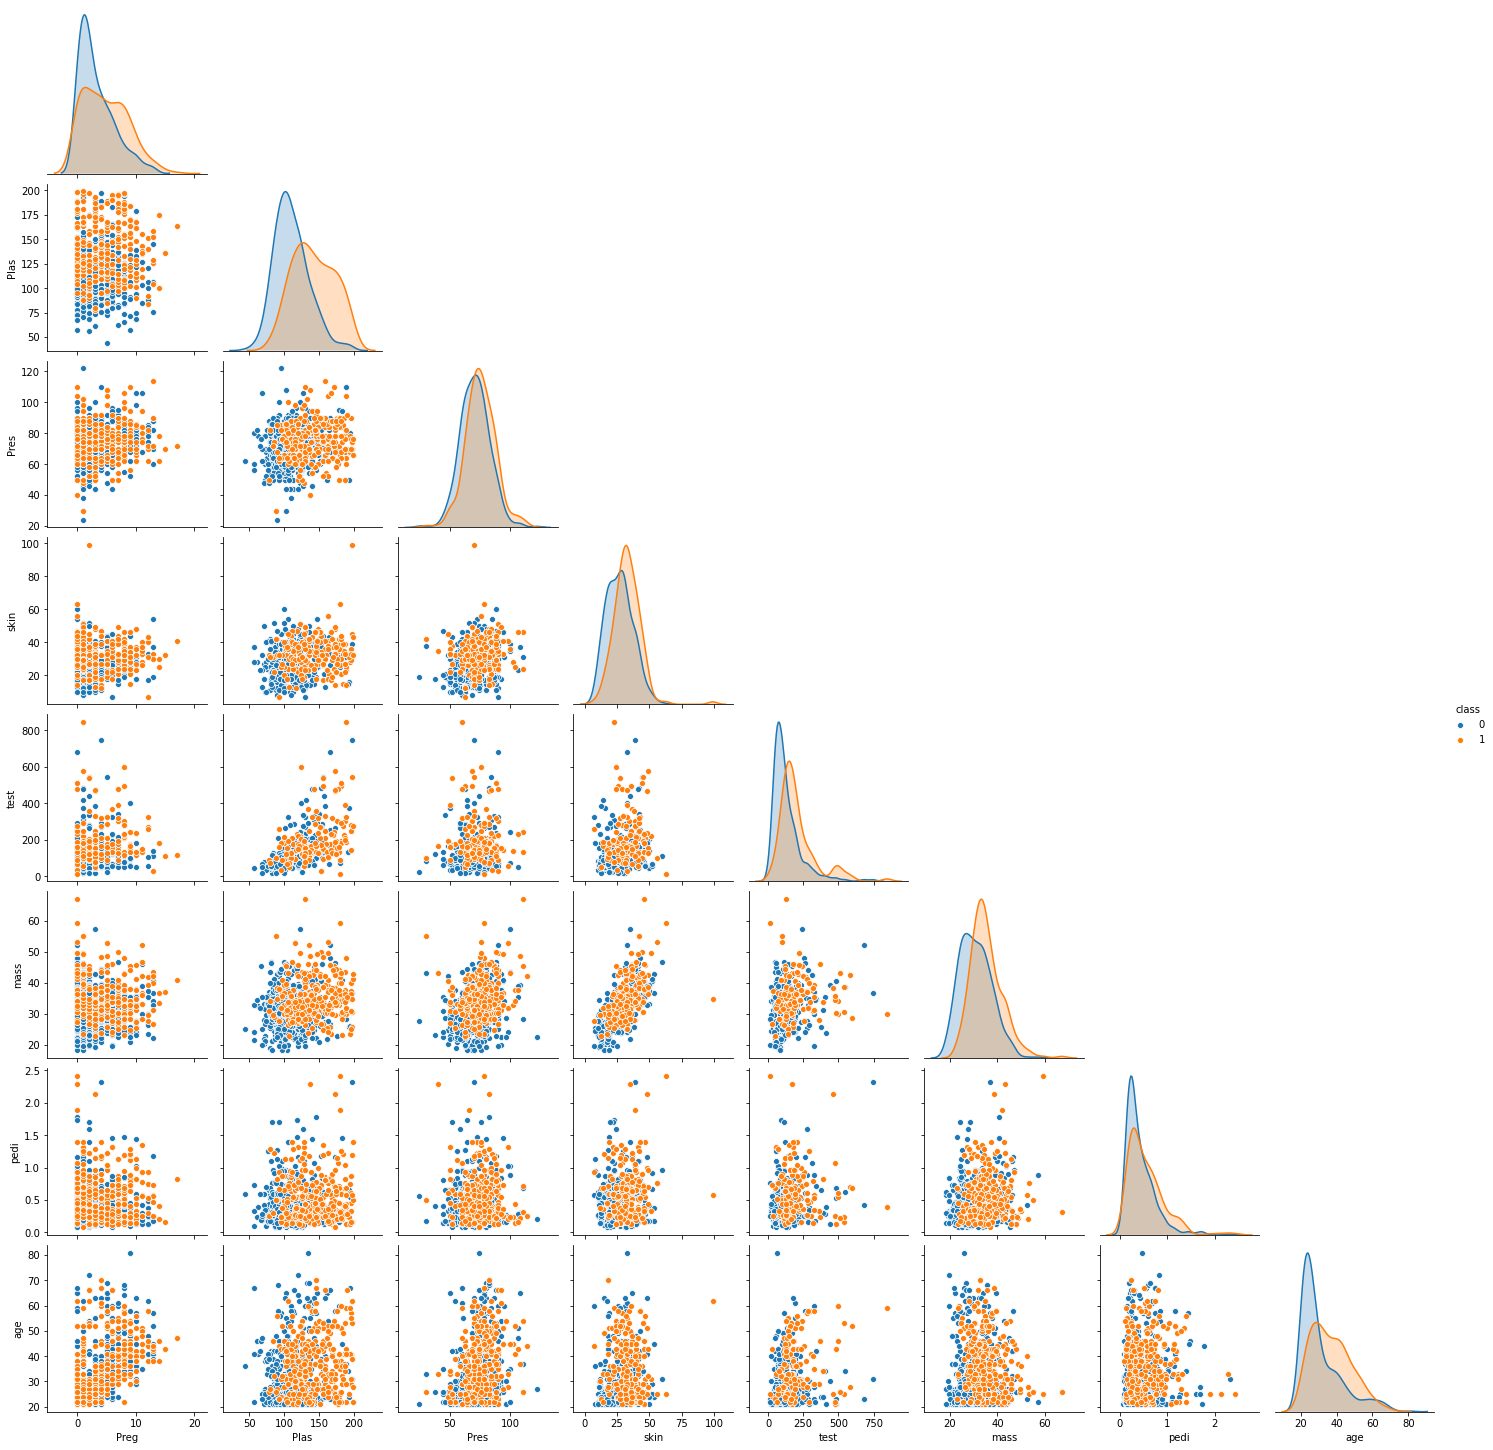

In [20]:
import seaborn as sns

sns.pairplot(data, hue='class', diag_kind='kde', corner=True);

In [16]:
no_zero_cols = ['Plas', 'Pres', 'skin', 'test', 'mass', 'pedi', 'age']

data[no_zero_cols] = data[no_zero_cols].replace(0, np.nan)

data.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [13]:
# split dataset into inputs and outputs
values = data.values
x = values[:,0:8]
y = values[:,8]

# fill missing values with median values
imputer = SimpleImputer(strategy='median')

transformed_x = imputer.fit_transform(x)

In [21]:
x_train, x_test, y_train, y_test = tts(transformed_x, y, test_size=.3, random_state=1)

tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [22]:
tree.score(x_train, y_train)

1.0

In [30]:
tree.score(x_test, y_test)

0.7705627705627706

## Nothing below here was in the video
This was definitely one of the worse videos of the course so far

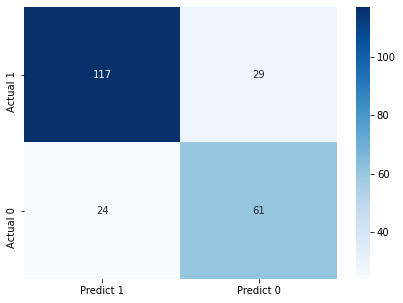

In [29]:
y_predict = tree.predict(x_test)

cm1 = metrics.confusion_matrix(y_test, y_predict, labels=[0,1])
df1 = pd.DataFrame(cm1, index=[i for i in ["Actual 1", "Actual 0"]], columns=[i for i in ["Predict 1","Predict 0"]])

plt.figure(figsize=(7,5));

sns.heatmap(df1, annot=True, cmap='Blues', fmt='d');

#### Regularize the DT

In [31]:
tree_r = DecisionTreeClassifier(criterion='entropy', max_depth=8)
tree_r.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [32]:
tree_r.score(x_test, y_test)

0.7748917748917749

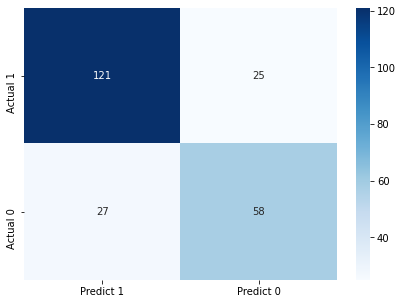

In [33]:
y_predict_r = tree_r.predict(x_test)

cm2 = metrics.confusion_matrix(y_test, y_predict_r, labels=[0,1])
df2 = pd.DataFrame(cm2, index=[i for i in ["Actual 1", "Actual 0"]], columns=[i for i in ["Predict 1", "Predict 0"]])

plt.figure(figsize=(7,5));

sns.heatmap(df2, annot=True, cmap='Blues', fmt='d');